In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Path to the SPIQA test-A images folder
base_path = '../../../Data/spiqa/test-A/SPIQA_testA_Images/SPIQA_testA_Images'


In [60]:
%config InlineBackend.figure_format = 'svg'

### Meta Data Analysis

Following are collected through the folder and files of the dataset.
- Image type distribution: How many figures vs. tables

- Paper image count: How many visuals each paper has

- Image resolution: Typical sizes — are there outliers?

- Aspect ratio: Helps catch unusually shaped figures/tables (e.g., squished plots)

In [7]:
# Collect metadata
image_data = []

for paper_id in os.listdir(base_path):
    print(paper_id)
    # paper_path = os.path.join(base_path, paper_id)
    # if not os.path.isdir(paper_path):
    #     continue

SPIQA_testA_Images


In [9]:

# Collect metadata
image_data = []

for paper_id in os.listdir(base_path):
    paper_path = os.path.join(base_path, paper_id)
    if not os.path.isdir(paper_path):
        continue
    
    for image_name in os.listdir(paper_path):
        if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        img_path = os.path.join(paper_path, image_name)

        try:
            with Image.open(img_path) as img:
                width, height = img.size
        except Exception as e:
            print(f"Error reading {img_path}: {e}")
            continue

        image_type = 'figure' if 'figure' in image_name.lower() else 'table' if 'table' in image_name.lower() else 'unknown'

        image_data.append({
            'paper_id': paper_id,
            'image_name': image_name,
            'image_type': image_type,
            'width': width,
            'height': height,
            'aspect_ratio': round(width / height, 2)
        })

# Convert to DataFrame
df = pd.DataFrame(image_data)

# Show sample data
print(df.head())


       paper_id                  image_name image_type  width  height  \
0  1603.00286v5  1603.00286v5-Figure1-1.png     figure    705     293   
1  1603.00286v5  1603.00286v5-Figure2-1.png     figure    185     184   
2  1603.00286v5  1603.00286v5-Figure3-1.png     figure    705     126   
3  1603.00286v5  1603.00286v5-Figure4-1.png     figure    607     224   
4  1603.00286v5  1603.00286v5-Figure5-1.png     figure    705     236   

   aspect_ratio  
0          2.41  
1          1.01  
2          5.60  
3          2.71  
4          2.99  


In [33]:
import fitz  # PyMuPDF

In [34]:
# Path to your PDFs
pdf_folder = '../../../Data/VisDoM-main/spiqa/docs'

# Step 1: Build a dict with page counts per paper
pdf_page_counts = {}

for file in os.listdir(pdf_folder):
    if file.endswith('.pdf'):
        paper_id = file.replace('.pdf', '')
        try:
            doc = fitz.open(os.path.join(pdf_folder, file))
            pdf_page_counts[paper_id] = len(doc)
        except Exception as e:
            print(f"Could not read {file}: {e}")
            pdf_page_counts[paper_id] = None

In [36]:
# Add a new column for number of pages
df['num_pages'] = df['paper_id'].map(pdf_page_counts)

In [37]:
print(df.head())

       paper_id                  image_name image_type  width  height  \
0  1603.00286v5  1603.00286v5-Figure1-1.png     figure    705     293   
1  1603.00286v5  1603.00286v5-Figure2-1.png     figure    185     184   
2  1603.00286v5  1603.00286v5-Figure3-1.png     figure    705     126   
3  1603.00286v5  1603.00286v5-Figure4-1.png     figure    607     224   
4  1603.00286v5  1603.00286v5-Figure5-1.png     figure    705     236   

   aspect_ratio  num_pages  
0          2.41         40  
1          1.01         40  
2          5.60         40  
3          2.71         40  
4          2.99         40  


#### EDA Visualization : Meta Data

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:

# Set a consistent, clean style
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.figsize": (8, 5)
})


In [53]:
custom_palette = {'figure': 'slateblue', 'table': 'tomato'}  # Adjust keys to match your actual image_type values

C:\Users\Lisara\AppData\Local\Temp\ipykernel_19068\3687457569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='image_type', data=df, palette=custom_palette,alpha=0.6, edgecolor='black')


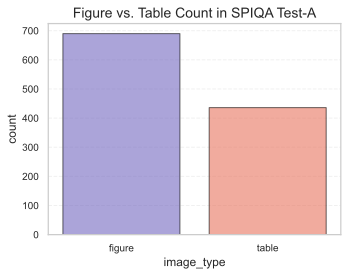

In [61]:
# 1. Count of figures vs. tables
plt.figure(figsize=(5, 4))
sns.countplot(x='image_type', data=df, palette=custom_palette,alpha=0.6, edgecolor='black')
plt.title("Figure vs. Table Count in SPIQA Test-A")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

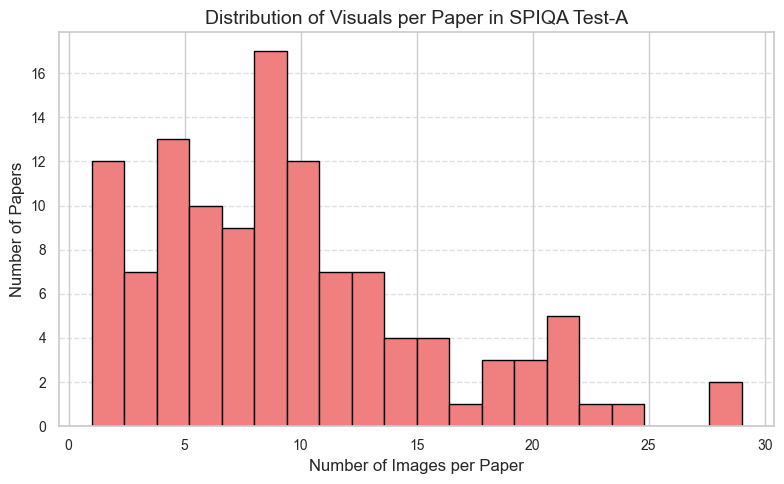

In [32]:

# 2. Number of images per paper
plt.figure()
df['paper_id'].value_counts().plot(kind='hist', bins=20, color='lightcoral', edgecolor='black')
plt.xlabel("Number of Images per Paper")
plt.ylabel("Number of Papers")
plt.title("Distribution of Visuals per Paper in SPIQA Test-A")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# sns.histplot(df['paper_id'].value_counts(), bins=20, kde=False, color='skyblue')
# plt.title('Images per Paper')
# plt.xlabel("Number of Images")
# plt.ylabel("Number of Papers")
# plt.tight_layout()
# plt.show()


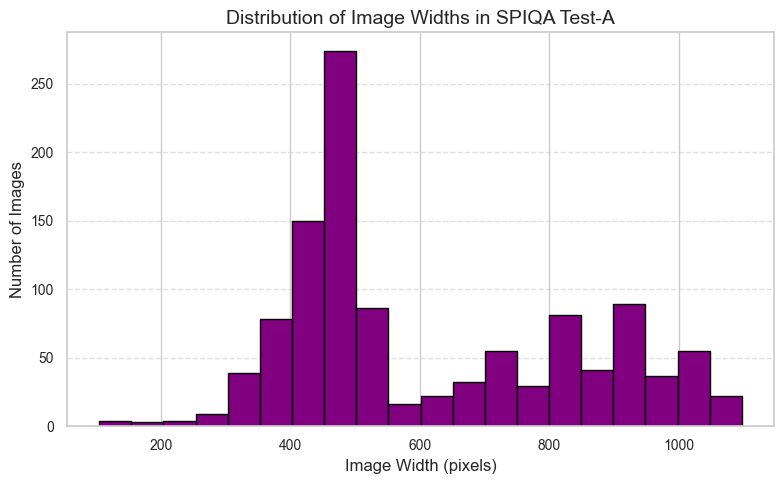

In [27]:

# 3. Image dimensions
plt.figure()
plt.hist(df['width'], bins=20, color='purple', edgecolor='black')
plt.xlabel("Image Width (pixels)")
plt.ylabel("Number of Images")
plt.title("Distribution of Image Widths in SPIQA Test-A")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# sns.histplot(df['width'], bins=20, kde=True, color='lightgreen')
# plt.title('Image Width Distribution')
# plt.xlabel('Width (pixels)')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()


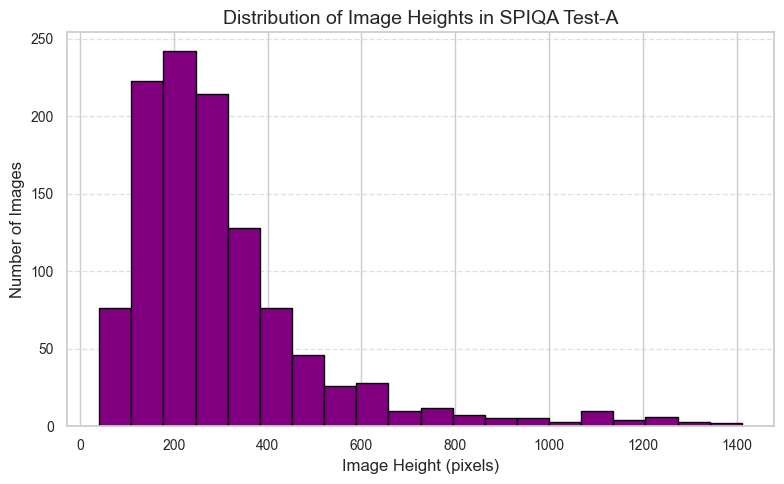

In [28]:

plt.figure()
plt.hist(df['height'], bins=20, color='purple', edgecolor='black')
plt.xlabel("Image Height (pixels)")
plt.ylabel("Number of Images")
plt.title("Distribution of Image Heights in SPIQA Test-A")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# sns.histplot(df['height'], bins=20, kde=True, color='salmon')
# plt.title('Image Height Distribution')
# plt.xlabel('Height (pixels)')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()


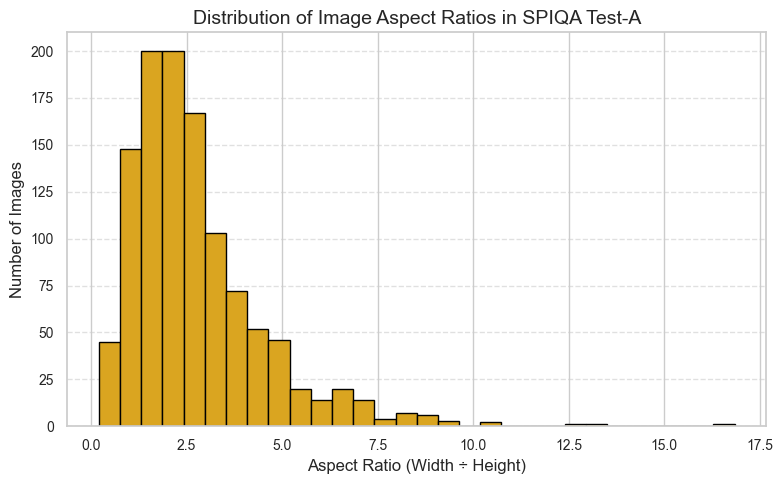

In [ ]:

# 4. Aspect ratio distribution
plt.figure()
plt.hist(df['aspect_ratio'], bins=30, color='goldenrod', edgecolor='black')
plt.xlabel("Aspect Ratio (Width ÷ Height)")
plt.ylabel("Number of Images")
plt.title("Distribution of Image Aspect Ratios in SPIQA Test-A")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



##### Images Per Page

In [38]:
# Group by paper_id
grouped = df.groupby('paper_id').agg(
    total_images=('image_name', 'count'),
    num_pages=('num_pages', 'first')
)

# Add images per page column
grouped['images_per_page'] = grouped['total_images'] / grouped['num_pages']
grouped.reset_index(inplace=True)

# Show sample
print(grouped.head())


       paper_id  total_images  num_pages  images_per_page
0  1603.00286v5             6         40         0.150000
1  1603.03833v4             6          9         0.666667
2  1605.07496v3            14         14         1.000000
3  1606.07384v2             2         33         0.060606
4  1608.02784v2             9          8         1.125000


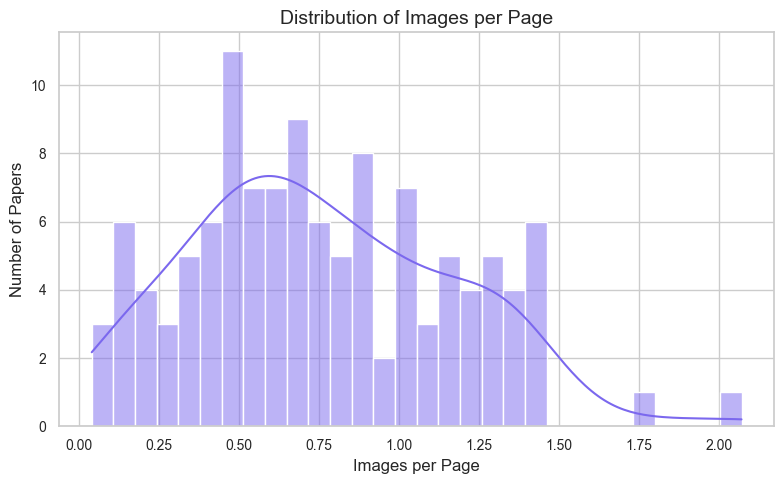

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(grouped['images_per_page'], bins=30, kde=True, color='mediumslateblue')
plt.title('Distribution of Images per Page')
plt.xlabel('Images per Page')
plt.ylabel('Number of Papers')
plt.tight_layout()
plt.show()

##### S Scatter Plot: Image Count vs. Page Count
This reveals correlation (if any) between length and visuals.

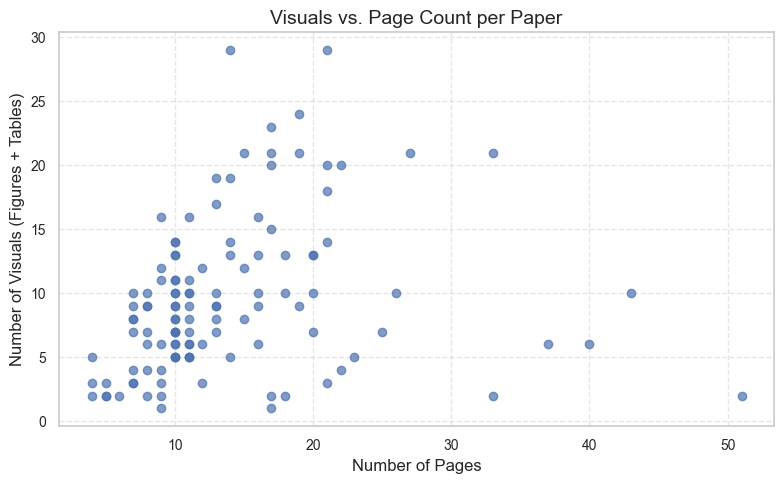

In [44]:
plt.figure(figsize=(8, 5))
plt.scatter(grouped['num_pages'], grouped['total_images'], alpha=0.7)
plt.xlabel('Number of Pages')
plt.ylabel('Number of Visuals (Figures + Tables)')
plt.title('Visuals vs. Page Count per Paper')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [45]:
correlation = grouped[['num_pages', 'total_images']].corr().iloc[0,1]
print(f"Correlation between page count and image count: {correlation:.2f}")

Correlation between page count and image count: 0.21


##### Scatter Plot: Images per Page vs. Number of Pages
This can help reveal whether shorter papers tend to be more image-heavy.

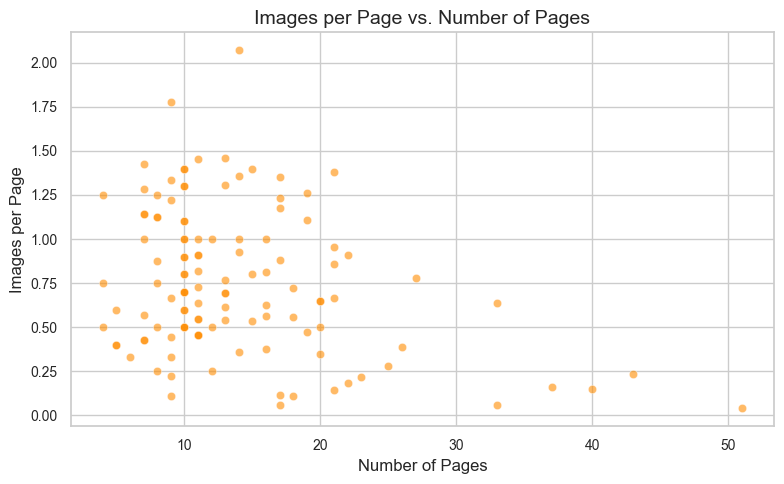

In [41]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=grouped, x='num_pages', y='images_per_page', alpha=0.6, color='darkorange')
plt.title('Images per Page vs. Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Images per Page')
plt.tight_layout()
plt.show()

##### Average Number of Visuals: Short vs. Long Papers

Short paper: ≤ 6 pages

Long paper: > 6 pages

In [42]:
# Categorize papers
grouped['paper_length'] = grouped['num_pages'].apply(lambda x: 'Short (≤6 pages)' if x <= 6 else 'Long (>6 pages)')

# Average number of visuals
avg_visuals = grouped.groupby('paper_length')['total_images'].mean()
print(avg_visuals)

paper_length
Long (>6 pages)     9.972973
Short (≤6 pages)    2.714286
Name: total_images, dtype: float64


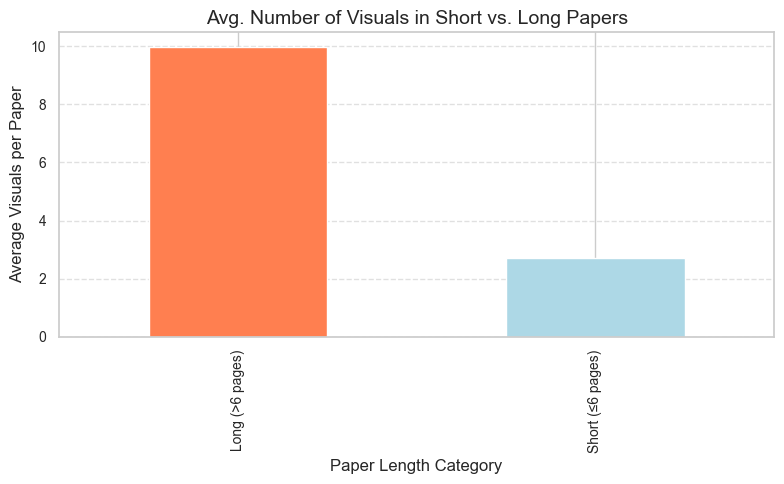

In [43]:
avg_visuals.plot(kind='bar', title='Avg. Number of Visuals in Short vs. Long Papers', color=['coral', 'lightblue'])
plt.ylabel('Average Visuals per Paper')
plt.xlabel('Paper Length Category')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### Separate Analysis for Figures vs. Tables
Split the analysis into figures and tables per paper.

In [46]:
# Group by paper and image_type
fig_table_grouped = df.groupby(['paper_id', 'image_type']).agg(count=('image_name', 'count')).unstack(fill_value=0)
fig_table_grouped.columns = fig_table_grouped.columns.droplevel(0)  # flatten
fig_table_grouped.reset_index(inplace=True)

# Merge with page count info
fig_table_grouped['num_pages'] = fig_table_grouped['paper_id'].map(pdf_page_counts)

# Calculate per-page metrics
fig_table_grouped['figures_per_page'] = fig_table_grouped.get('figure', 0) / fig_table_grouped['num_pages']
fig_table_grouped['tables_per_page'] = fig_table_grouped.get('table', 0) / fig_table_grouped['num_pages']

# Show a few rows
print(fig_table_grouped.head())

image_type      paper_id  figure  table  num_pages  figures_per_page  \
0           1603.00286v5       5      1         40          0.125000   
1           1603.03833v4       5      1          9          0.555556   
2           1605.07496v3      11      3         14          0.785714   
3           1606.07384v2       2      0         33          0.060606   
4           1608.02784v2       6      3          8          0.750000   

image_type  tables_per_page  
0                  0.025000  
1                  0.111111  
2                  0.214286  
3                  0.000000  
4                  0.375000  


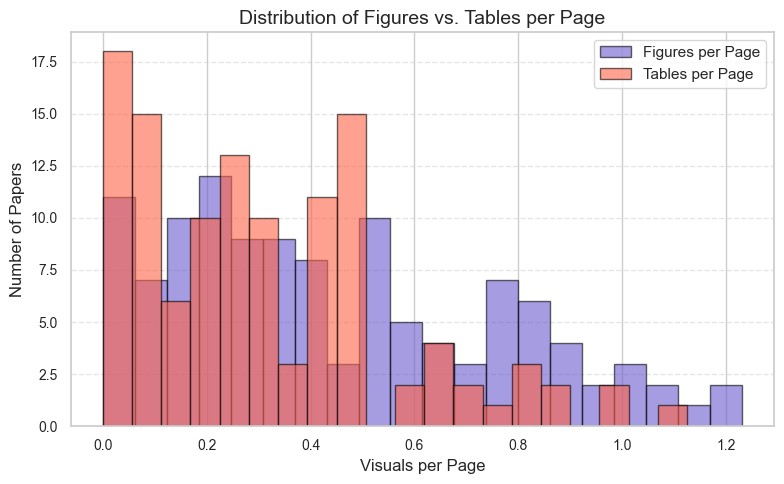

In [47]:
plt.figure(figsize=(8, 5))
plt.hist(fig_table_grouped['figures_per_page'], bins=20, alpha=0.6, label='Figures per Page', color='slateblue', edgecolor='black')
plt.hist(fig_table_grouped['tables_per_page'], bins=20, alpha=0.6, label='Tables per Page', color='tomato', edgecolor='black')
plt.xlabel('Visuals per Page')
plt.ylabel('Number of Papers')
plt.title('Distribution of Figures vs. Tables per Page')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
df['paper_id'].nunique

<bound method IndexOpsMixin.nunique of 0       1603.00286v5
1       1603.00286v5
2       1603.00286v5
3       1603.00286v5
4       1603.00286v5
            ...     
1121    1906.10843v1
1122    1906.10843v1
1123    1906.10843v1
1124    1906.10843v1
1125    1906.10843v1
Name: paper_id, Length: 1126, dtype: object>

#####  Flagging Unusual Papers (Very High or Low Visual Density)
Identify papers with:

Very low image density (< 0.2 images/page)

Very high image density (> 2 images/page)

In [62]:
# Reuse grouped from earlier
low_density = grouped[grouped['images_per_page'] < 0.2]
high_density = grouped[grouped['images_per_page'] > 2]

print(" Papers with Very Low Visual Density (< 0.2 images/page):")
print(low_density[['paper_id', 'total_images', 'num_pages', 'images_per_page']])

print("\n Papers with Very High Visual Density (> 2 images/page):")
print(high_density[['paper_id', 'total_images', 'num_pages', 'images_per_page']])

 Papers with Very Low Visual Density (< 0.2 images/page):
         paper_id  total_images  num_pages  images_per_page
0    1603.00286v5             6         40         0.150000
3    1606.07384v2             2         33         0.060606
11   1612.02803v5             3         21         0.142857
17   1703.00899v2             1         17         0.058824
32   1705.07384v2             2         17         0.117647
56   1709.00139v4             2         18         0.111111
69   1803.04383v2             6         37         0.162162
71   1803.05776v2             1          9         0.111111
85   1805.02349v2             2         51         0.039216
104  1811.06635v1             4         22         0.181818

 Papers with Very High Visual Density (> 2 images/page):
        paper_id  total_images  num_pages  images_per_page
87  1805.04687v2            29         14         2.071429


---

### Including the Questions

In [187]:
import pandas as pd

qa_csv_path = '../../../Data/VisDoM-main/spiqa/spiqa.csv' 
qa_df = pd.read_csv(qa_csv_path)

# Preview
print(qa_df.columns)
print(qa_df[['q_id', 'doc_id', 'question', 'reference_figure']].head())


Index(['q_id', 'doc_id', 'old_question', 'answer', 'doc_path', 'documents',
       'rationale', 'reference_figure', 'paper_title', 'paper_abstract',
       'caption', 'question'],
      dtype='object')
      q_id        doc_id                                           question  \
0  spiqa_0  1805.01216v3   \n\nWhat is the difference between the origin...   
1  spiqa_1  1805.07567v2   \n\nWhat is the effect of increasing the valu...   
2  spiqa_2  1603.00286v5   \n\nWhy does the author state that there is a...   
3  spiqa_3  1805.06431v4   How does the performance of ChoiceNet compare...   
4  spiqa_4  1802.07459v2   How many negative samples are there in the tr...   

             reference_figure  
0  1805.01216v3-Figure9-1.png  
1  1805.07567v2-Figure6-1.png  
2  1603.00286v5-Figure1-1.png  
3   1805.06431v4-Table2-1.png  
4   1802.07459v2-Table1-1.png  


In [188]:
qa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   q_id              586 non-null    object
 1   doc_id            586 non-null    object
 2   old_question      586 non-null    object
 3   answer            586 non-null    object
 4   doc_path          586 non-null    object
 5   documents         586 non-null    object
 6   rationale         586 non-null    object
 7   reference_figure  586 non-null    object
 8   paper_title       586 non-null    object
 9   paper_abstract    586 non-null    object
 10  caption           586 non-null    object
 11  question          586 non-null    object
dtypes: object(12)
memory usage: 55.1+ KB


In [189]:
# Merge question and image metadata
# Sanitize image names if needed
df['reference_key'] = df['paper_id'] + '/' + df['image_name']
qa_df['reference_key'] = qa_df['doc_id'] + '/' + qa_df['reference_figure']

# Merge question and image metadata
merged_df = pd.merge(qa_df, df, on='reference_key', how='left')

In [190]:
merged_df.sample(4)

,q_id,doc_id,old_question,answer,doc_path,documents,rationale,reference_figure,paper_title,paper_abstract,caption,question,reference_key,paper_id,image_name,image_type,width,height,aspect_ratio,num_pages
310,spiqa_311,1707.01917v2,What specific role does OpenIE play in extract...,OpenIE is used to extract tuples from the unla...,1707.01917v2.pdf,"['1707.01917v2.pdf', '1706.04269v2.pdf', '1705...",The figure shows that OpenIE is used to proces...,1707.01917v2-Figure1-1.png,Higher-order Relation Schema Induction using T...,Relation Schema Induction (RSI) is the problem...,Overview of Step 1 of TFBA. Rather than factor...,What is the role of OpenIE in Step 1 of TFBA?,1707.01917v2/1707.01917v2-Figure1-1.png,1707.01917v2,1707.01917v2-Figure1-1.png,figure,850,425,2.00,10
241,spiqa_242,1811.08481v2,Referring to the figure on the accuracy of gra...,Training on more diverse data improves the acc...,1811.08481v2.pdf,"['1811.08481v2.pdf', '1809.01246v1.pdf', '1705...",The table shows that the accuracy of the graph...,1811.08481v2-Table4-1.png,VQA with no questions-answers training,Methods for teaching machines to answer visual...,Accuracy of graph representation for VQA [8] s...,What is the effect of training on more diverse...,1811.08481v2/1811.08481v2-Table4-1.png,1811.08481v2,1811.08481v2-Table4-1.png,table,385,106,3.63,11
495,spiqa_505,1710.05654v2,"In the figure titled ""Connectivity across clas...",The log model.,1710.05654v2.pdf,"['1710.05654v2.pdf', '1805.08751v2.pdf', '1706...",The rightmost plot shows that the log model ha...,1710.05654v2-Figure5-1.png,Large Scale Graph Learning from Smooth Signals,"Graphs are a prevalent tool in data science, a...",Connectivity across classes of MNIST. The grap...,Which model is the most effective at connectin...,1710.05654v2/1710.05654v2-Figure5-1.png,1710.05654v2,1710.05654v2-Figure5-1.png,figure,827,251,3.29,21
154,spiqa_155,1705.08016v3,What trend is observed in the test accuracy of...,The test accuracy of all models decreases as λ...,1705.08016v3.pdf,"['1705.08016v3.pdf', '1710.06177v2.pdf', '1705...",The left plot shows the test accuracy of the d...,1705.08016v3-Figure2-1.png,Pairwise Confusion for Fine-Grained Visual Cla...,Fine-Grained Visual Classification (FGVC) data...,(left) Variation of test accuracy on CUB-200-2...,How does the test accuracy of the different mo...,1705.08016v3/1705.08016v3-Figure2-1.png,1705.08016v3,1705.08016v3-Figure2-1.png,figure,655,210,3.12,25


In [191]:
merged_df.rename(columns={'old_question':'aug_question'}, inplace=True)
qa_df.rename(columns={'old_question':'aug_question'}, inplace=True)

In [192]:
merged_df.sample(4)

,q_id,doc_id,aug_question,answer,doc_path,documents,rationale,reference_figure,paper_title,paper_abstract,caption,question,reference_key,paper_id,image_name,image_type,width,height,aspect_ratio,num_pages
102,spiqa_102,1812.00281v3,Based on the camera-ablation study figure in t...,The accuracy of the garment reconstruction inc...,1812.00281v3.pdf,"['1812.00281v3.pdf', '1708.05239v3.pdf', '1803...",The plot on the right shows that the error in ...,1812.00281v3-Figure8-1.png,HUMBI: A Large Multiview Dataset of Human Body...,This paper presents a new large multiview data...,We conduct camera-ablation study to evaluate t...,How does the number of cameras used affect the...,1812.00281v3/1812.00281v3-Figure8-1.png,1812.00281v3,1812.00281v3-Figure8-1.png,figure,492,255,1.93,15
285,spiqa_286,1809.01246v1,"Based on the figure showing ""Buffer Percentage...",The buffer percentage decreases as the width o...,1809.01246v1.pdf,"['1809.01246v1.pdf', '1707.06320v2.pdf', '1707...",The figure shows that the buffer percentage de...,1809.01246v1-Figure13-1.png,Fast and Accurate Graph Stream Summarization,A graph stream is a continuous sequence of dat...,Buffer Percentage,What is the relationship between the buffer pe...,1809.01246v1/1809.01246v1-Figure13-1.png,1809.01246v1,1809.01246v1-Figure13-1.png,figure,943,165,5.72,14
300,spiqa_301,1707.08608v3,Referring to the figure illustrating the shift...,The accuracy of the output increases as the nu...,1707.08608v3.pdf,"['1707.08608v3.pdf', '1804.05938v2.pdf', '1803...",The figure shows that the accuracy of the outp...,1707.08608v3-Table8-1.png,Gradient-based Inference for Networks with Out...,Practitioners apply neural networks to increas...,A shift-reduce example for which the method su...,What is the relationship between the number of...,1707.08608v3/1707.08608v3-Table8-1.png,1707.08608v3,1707.08608v3-Table8-1.png,table,694,125,5.55,11
38,spiqa_38,1707.08608v3,In the sequence transduction example depicted ...,The accuracy of the model increased from 66.7%...,1707.08608v3.pdf,"['1707.08608v3.pdf', '1708.00160v2.pdf', '1901...",The table shows that the accuracy of the model...,1707.08608v3-Table9-1.png,Gradient-based Inference for Networks with Out...,Practitioners apply neural networks to increas...,A sequence transduction example for which enfo...,How did the accuracy of the model change as th...,1707.08608v3/1707.08608v3-Table9-1.png,1707.08608v3,1707.08608v3-Table9-1.png,table,718,144,4.99,11


##### Question count per visual

In [151]:
qa_merged = merged_df

In [80]:
question_counts = qa_merged.groupby('reference_figure')['q_id'].count().reset_index(name='num_questions')
print(question_counts.sort_values('num_questions', ascending=False).head())

               reference_figure  num_questions
585   1906.10843v1-Table5-1.png              1
0    1603.00286v5-Figure1-1.png              1
1    1603.00286v5-Figure2-1.png              1
2    1603.00286v5-Figure3-1.png              1
3    1603.00286v5-Figure4-1.png              1


In [84]:
question_counts['num_questions'].unique()

array([1])

##### Questions per Paper

In [112]:
custom_palette = {'figure': 'slateblue', 'table': 'tomato','question':'cornflowerblue'}

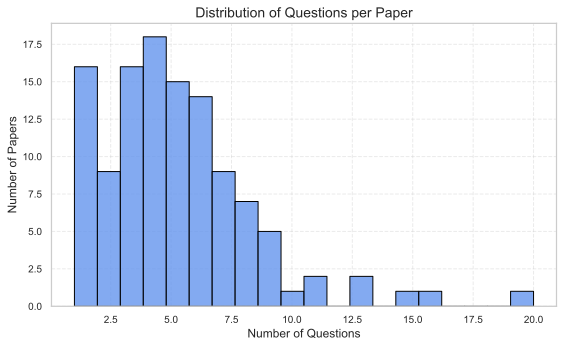

In [107]:
questions_per_paper = qa_merged['doc_id'].value_counts()
# plt.title("Distribution of Questions per Paper")
# plt.xlabel("Number of Questions")
# plt.ylabel("Number of Papers")
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(8, 5))

# Plot histogram
sns.histplot(questions_per_paper, bins=20, kde=False, color='cornflowerblue', edgecolor='black', alpha=0.8)

# Titles and labels
plt.title("Distribution of Questions per Paper", fontsize=14)
plt.xlabel("Number of Questions", fontsize=12)
plt.ylabel("Number of Papers", fontsize=12)

# Grid styling
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

##### Question Types by Visual Type (table vs. figure)
should have image_type in the merged dataset:

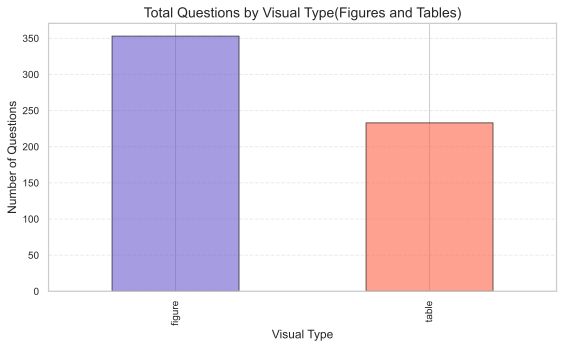

In [118]:
qtype_by_image = merged_df.groupby('image_type')['q_id'].count()
# Match colors to index (image_type)
colors = [custom_palette.get(img_type, 'gray') for img_type in qtype_by_image.index]

# Plot
plt.figure(figsize=(8, 5))
qtype_by_image.plot(kind='bar', color=colors,edgecolor='black', alpha=0.6)
plt.title('Total Questions by Visual Type(Figures and Tables)', fontsize=14)
plt.xlabel('Visual Type', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### Question Length vs. Visual Type : box Plot

In [131]:
merged_df['question_len'] = merged_df['aug_question'].fillna('').apply(lambda x: len(x.split()))


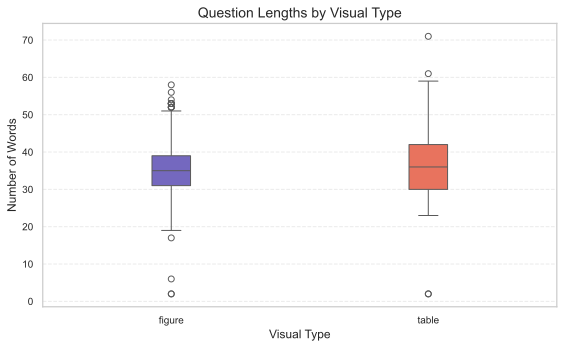

In [127]:
sns.boxplot(data=merged_df, x='image_type', y='question_len', palette={'figure': 'slateblue', 'table': 'tomato'},hue='image_type',width=0.15)

plt.title('Question Lengths by Visual Type', fontsize=14)
plt.xlabel('Visual Type', fontsize=12)
plt.ylabel('Number of Words', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### Question per page : Histogram

In [128]:
# num_pages from earlier:

qa_merged['num_pages'] = qa_merged['doc_id'].map(pdf_page_counts)
qa_merged['questions_per_page'] = qa_merged.groupby('doc_id')['q_id'].transform('count') / qa_merged['num_pages']

C:\Users\Lisara\AppData\Local\Temp\ipykernel_19068\912325222.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(qa_merged['questions_per_page'], bins=30, kde=True, palette=custom_palette, edgecolor='white', alpha=0.8)


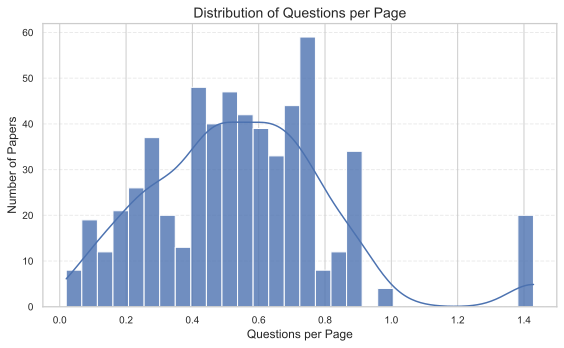

In [133]:
plt.figure(figsize=(8, 5))
sns.histplot(qa_merged['questions_per_page'], bins=30, kde=True, palette=custom_palette, edgecolor='white', alpha=0.8)
plt.title('Distribution of Questions per Page', fontsize=14)
plt.xlabel('Questions per Page', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### Boxplot of Questions count per Page by Visual Type
can see if certain visuals lead to denser questions.


C:\Users\Lisara\AppData\Local\Temp\ipykernel_19068\944025062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


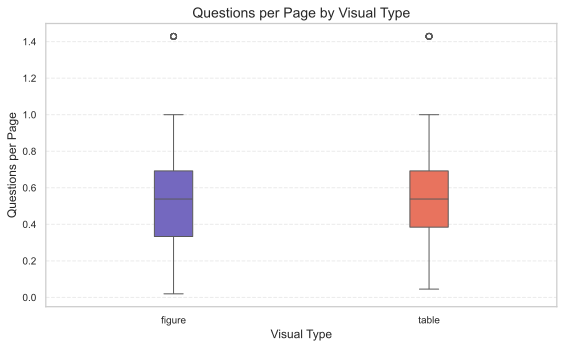

In [137]:
plt.figure()
sns.boxplot(
    data=qa_merged,
    x='image_type',
    y='questions_per_page',
    palette=custom_palette,
    width=0.15
)
plt.title('Questions per Page by Visual Type', fontsize=14)
plt.xlabel('Visual Type', fontsize=12)
plt.ylabel('Questions per Page', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### Violin Plot for Style + Distribution

C:\Users\Lisara\AppData\Local\Temp\ipykernel_19068\2836546597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


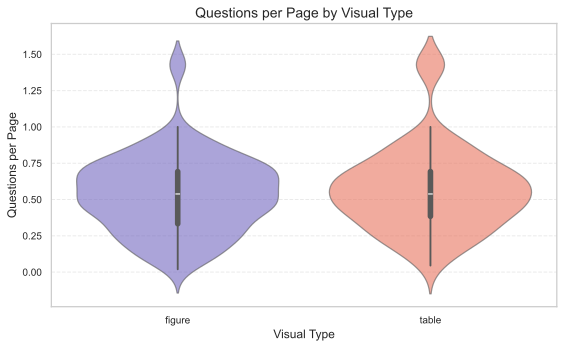

In [138]:
plt.figure()
sns.violinplot(
    data=qa_merged,
    x='image_type',
    y='questions_per_page',
    palette=custom_palette,
    alpha = 0.6
)
plt.title('Questions per Page by Visual Type', fontsize=14)
plt.xlabel('Visual Type', fontsize=12)
plt.ylabel('Questions per Page', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### Question types (based on wording)

In [102]:
qa_merged['question_type'] = qa_merged['aug_question'].str.lower().str.extract(r'^(what|how|why|which|is|does|are|when|where)')

print(qa_merged['question_type'].value_counts())

question_type
how      48
what     25
which     7
why       3
does      1
when      1
Name: count, dtype: int64


### Including the Answers

In [140]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [144]:
custom_palette = {
    'figure': 'slateblue',
    'table': 'tomato',
    'question': 'cornflowerblue',
    'answer' : 'salmon'
}

# Example: generate a word cloud for one type (e.g., 'figure')
def color_func(label_type, *args, **kwargs):
        return custom_palette.get(label_type, 'black')  # fallback to black

    # wc = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text)
# Function to generate a wordcloud with the given type's color
def make_wordcloud(text, label_type):
    def color_func(*args, **kwargs):
        return custom_palette.get(label_type, 'gray')  # fallback color

    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        color_func=color_func,
        collocations=False
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {label_type.capitalize()}", fontsize=16)
    plt.tight_layout()
    plt.show()

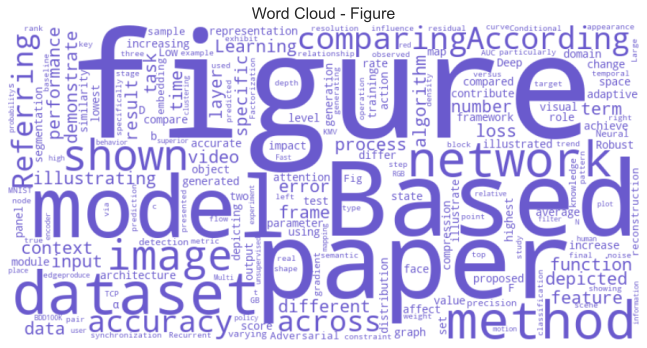

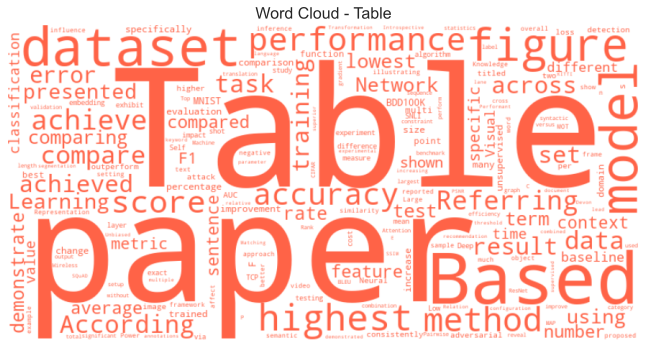

In [145]:
# Generate word clouds for each image_type
for img_type in ['figure', 'table']:
    if img_type in qa_merged['image_type'].unique():
        text = " ".join(qa_merged[qa_merged['image_type'] == img_type]['aug_question'].dropna())
        make_wordcloud(text, img_type)

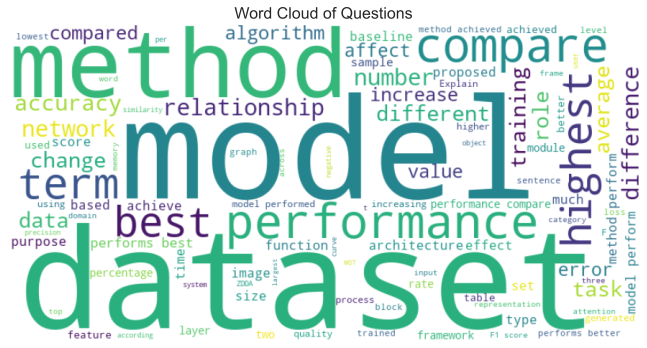

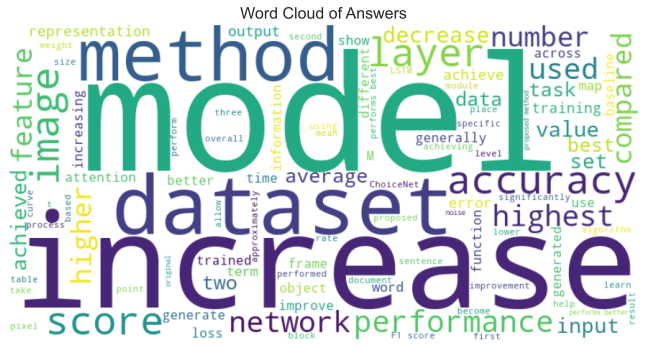

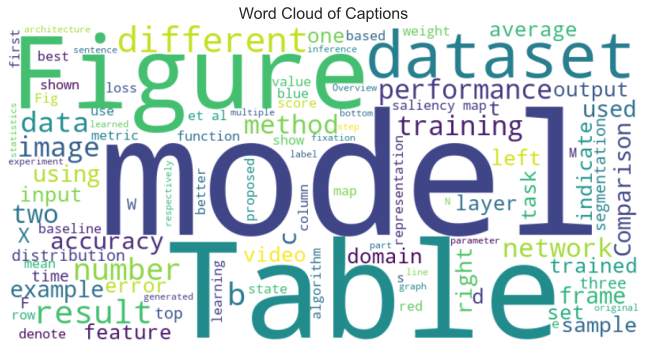

In [ ]:
# Generate word clouds for questions, answers, captions
def generate_wordcloud(text_data, title, bg,max_words=100):
    text = " ".join(t for t in text_data.dropna() if isinstance(t, str))
    wordcloud = WordCloud(width=800, height=400, background_color=bg, max_words=max_words, color_func=color_func()).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Word clouds
generate_wordcloud(qa_df['aug_question'], 'Word Cloud of Questions','question',)
generate_wordcloud(qa_df['answer'], 'Word Cloud of Answers')
generate_wordcloud(qa_df['caption'], 'Word Cloud of Captions')


In [159]:
qa_df.columns

Index(['q_id', 'doc_id', 'old_question', 'answer', 'doc_path', 'documents',
       'rationale', 'reference_figure', 'paper_title', 'paper_abstract',
       'caption', 'question', 'reference_key'],
      dtype='object')

In [167]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
import random

# Define custom color palettes
palette_map = {
    'question': ['darkolivegreen', 'olive', 'yellowgreen'],
    'answer': ['darkgoldenrod', 'peru', 'saddlebrown'],
    'caption': ['chocolate', 'rosybrown', 'indianred']
}


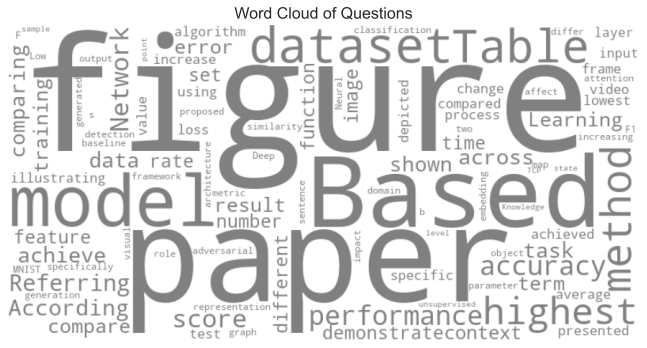

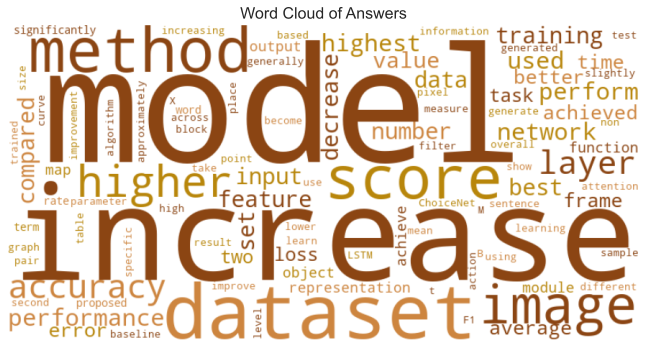

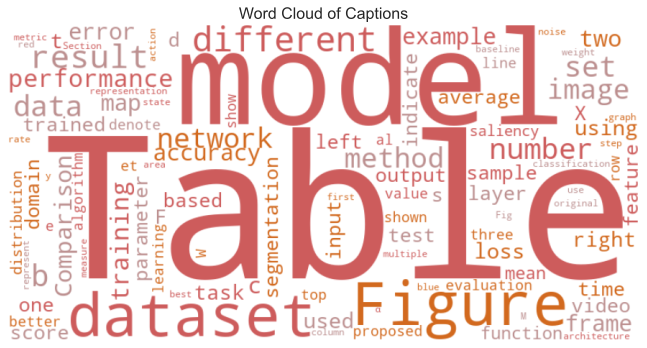

In [168]:

# Dynamic color function generator
def color_func(palette):
    def inner(*args, **kwargs):
        return random.choice(palette)
    return inner

# Updated word cloud generator
def generate_wordcloud(text_data, title, label, max_words=100):
    text = " ".join(t for t in text_data.dropna() if isinstance(t, str))
    colors = palette_map.get(label, ['gray'])  # fallback to gray
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=max_words,
        color_func=color_func(colors),
        collocations=False
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate word clouds
generate_wordcloud(qa_df['aug_question'], 'Word Cloud of Questions', 'aug_question')
generate_wordcloud(qa_df['answer'], 'Word Cloud of Answers', 'answer')
generate_wordcloud(qa_df['caption'], 'Word Cloud of Captions', 'caption')


#### Answer Length and Other columns

In [193]:
qa_df = merged_df

In [194]:
# Basic EDA: Relationship between answer length and other columns
qa_df['answer_length'] = qa_df['answer'].astype(str).apply(lambda x: len(x.split()))
qa_df['caption_length'] = qa_df['caption'].astype(str).apply(lambda x: len(x.split()))
qa_df['question_length'] = qa_df['aug_question'].astype(str).apply(lambda x: len(x.split()))

In [195]:
# Check correlations
correlations = qa_df[['answer_length', 'caption_length', 'question_length']].corr()
correlations


,answer_length,caption_length,question_length
answer_length,1.000000,0.039245,0.431029
caption_length,0.039245,1.000000,0.184429
question_length,0.431029,0.184429,1.000000


Moderate correlation between question length and answer length (0.43): Longer questions tend to result in longer answers.

Very weak correlation between caption length and answer length (0.04): Captions do not strongly influence answer verbosity.



##### Answer Length vs Caption Length

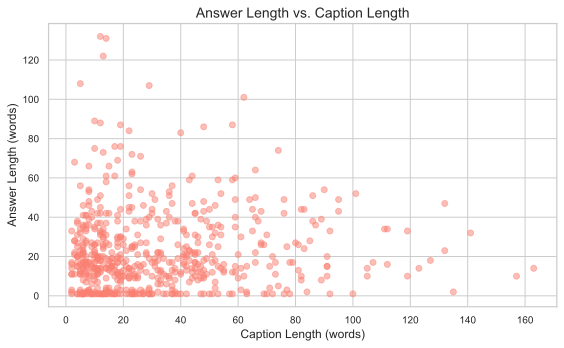

In [175]:

# Show relationships visually
plt.figure(figsize=(8, 5))
plt.scatter(qa_df['caption_length'], qa_df['answer_length'], alpha=0.5, color = 'salmon')
plt.xlabel("Caption Length (words)")
plt.ylabel("Answer Length (words)")
plt.title("Answer Length vs. Caption Length")
plt.grid(True)
plt.tight_layout()
plt.show()


##### Answer length vs Question length : Scatterplot

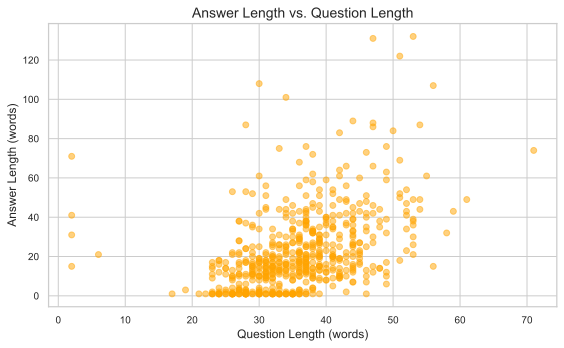

In [177]:
plt.figure(figsize=(8, 5))
plt.scatter(qa_df['question_length'], qa_df['answer_length'], alpha=0.5, color='orange')
plt.xlabel("Question Length (words)")
plt.ylabel("Answer Length (words)")
plt.title("Answer Length vs. Question Length")
plt.grid(True)
plt.tight_layout()
plt.show()

In [196]:
# qa_df = pd.read_csv(csv_path)

# Basic cleaning and setup
qa_df['answer'] = qa_df['answer'].astype(str)
qa_df['aug_question'] = qa_df['aug_question'].astype(str)
qa_df['caption'] = qa_df['caption'].astype(str)

In [197]:
# Add length columns
qa_df['answer_length'] = qa_df['answer'].apply(lambda x: len(x.split()))
qa_df['caption_length'] = qa_df['caption'].apply(lambda x: len(x.split()))
qa_df['question_length'] = qa_df['aug_question'].apply(lambda x: len(x.split()))


##### Answer length and Image type(figure and table) : Box plot

In [199]:
# --- Part 1: Answer length by image type ---
answer_by_image_type = qa_df.groupby('image_type')['answer_length'].describe()
# Return descriptive stats
answer_by_image_type


,count,mean,std,min,25%,50%,75%,max
image_type,,,,,,,,
figure,353.0,19.546742,16.444766,1.0,9.0,16.0,26.0,132.0
table,233.0,27.064378,24.704812,1.0,11.0,20.0,38.0,131.0


C:\Users\Lisara\AppData\Local\Temp\ipykernel_19068\790128371.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=qa_df, x='image_type', y='answer_length', palette={'figure': 'slateblue', 'table': 'tomato'}, width=0.15)


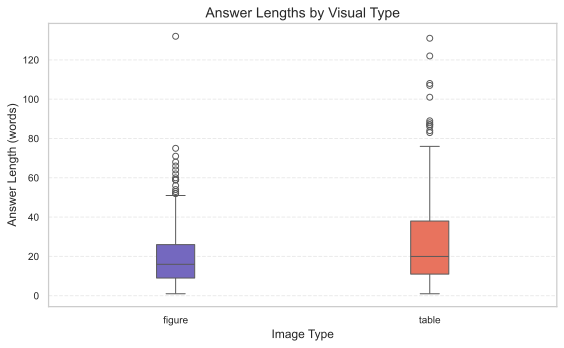

In [204]:
plt.figure()
sns.boxplot(data=qa_df, x='image_type', y='answer_length', palette={'figure': 'slateblue', 'table': 'tomato'}, width=0.15)
plt.title('Answer Lengths by Visual Type')
plt.xlabel('Image Type')
plt.ylabel('Answer Length (words)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### Answer Length vs Page Count : Scatter Plot

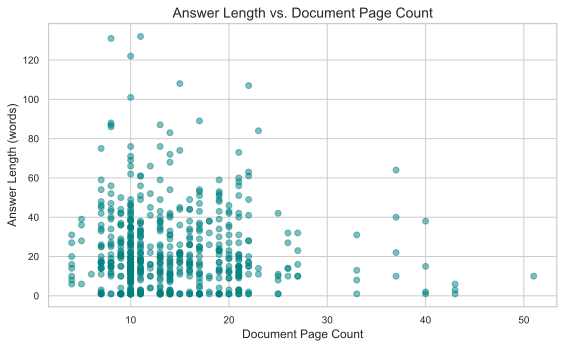

In [205]:
# --- Part 2: Answer length vs page count ---
# Convert page count (if available) to numeric
qa_df['num_pages'] = pd.to_numeric(qa_df['num_pages'], errors='coerce')

# Scatter: answer length vs number of pages
plt.figure(figsize=(8, 5))
plt.scatter(qa_df['num_pages'], qa_df['answer_length'], alpha=0.5, color='teal')
plt.xlabel("Document Page Count")
plt.ylabel("Answer Length (words)")
plt.title("Answer Length vs. Document Page Count")
plt.grid(True)
plt.tight_layout()
plt.show()

- Only one question was asked from a visual element.
- 